### Import neccassary packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot, PlotDropDown, HeatmapDropDown, InteractivePrice
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Identify the actual path of this jupyter file

In [28]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)
print(pd.__version__)
print(pd.__file__)
print(np.__version__)
print(np.__file__)

c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt
1.5.3
c:\Python397\lib\site-packages\pandas\__init__.py
1.20.3
c:\Python397\lib\site-packages\numpy\__init__.py


### Import data

In [29]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
print(data['Forest'])

{'Forest':       RegionCode  Period    ForStock      ForArea   FGDPCap     alpha  \
0             a0       0          46         1940  4027.502 -0.002767   
1             a0       0          46         1940  4027.502 -0.002767   
2             a0       0          46         1940  4027.502 -0.002767   
3             a0       0          46         1940  4027.502 -0.002767   
4             a0       0          46         1940  4027.502 -0.002767   
...          ...     ...         ...          ...       ...       ...   
25195         r9       9  830.931047  5503.912323  1973.337  0.009176   
25196         r9       9  830.931047  5503.912323  1973.337  0.009176   
25197         r9       9  830.931047  5503.912323  1973.337  0.009176   
25198         r9       9  830.931047  5503.912323  1973.337  0.009176   
25199         r9       9  830.931047  5503.912323  1973.337  0.009176   

          gamma       ga        gu  supply_from_forest CO2Price  
0      0.011213      NaN       NaN            

### Plot predefined scenario results 

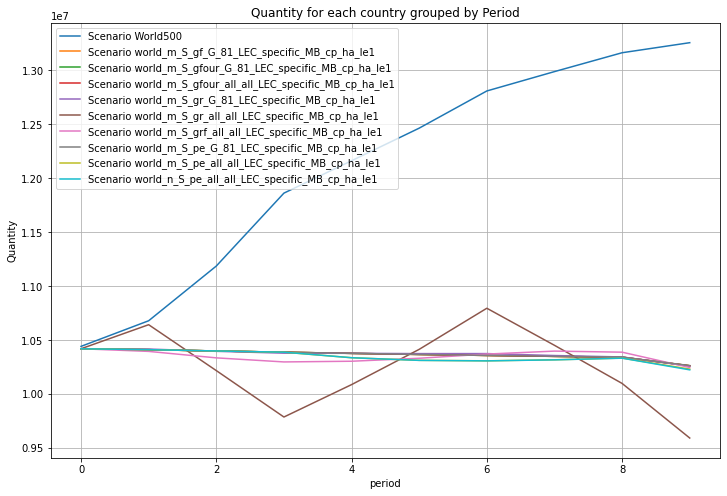

In [30]:
data = data["data_periods"]
sc_plot = sc_plot()
sc_plot.predefined_plot(data)

### Interactive scenario results (quantities)

In [31]:
plot_dropdown_instance = PlotDropDown(data)
#plot_dropdown_instance.update_plot_data(region=plot_dropdown_instance.regioncode_dropdown.value,
#                                        model=plot_dropdown_instance.model_dropdown.value,
#                                        id=plot_dropdown_instance.id_dropdown.value,
#                                        domain=plot_dropdown_instance.domain_dropdown.value,
#                                        commodity=plot_dropdown_instance.commodity_code_dropdown.value)

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

### Interactive scenario results (prices)

In [32]:
price_interactive = InteractivePrice(data)




Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a…

Dropdown(description='Select Model:', options=('Alle', 'GFPMpt', 'GFPM'), value='Alle')

Dropdown(description='Select ID:', options=('Alle', 1, 2, 3, 4, 5, 6, 7, 8, 9, 0), value='Alle')

Dropdown(description='Select Domain:', options=('Alle', 'Demand', 'TransportationExport', 'TransportationImpor…

Dropdown(description='Select CommodityCode:', options=('Alle', 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,…

Output()

Output()

### Interactive Heatmap

interactive(children=(Dropdown(description='Select Scenario:', options=('world_m_S_gfour_all_all_LEC_specific_…

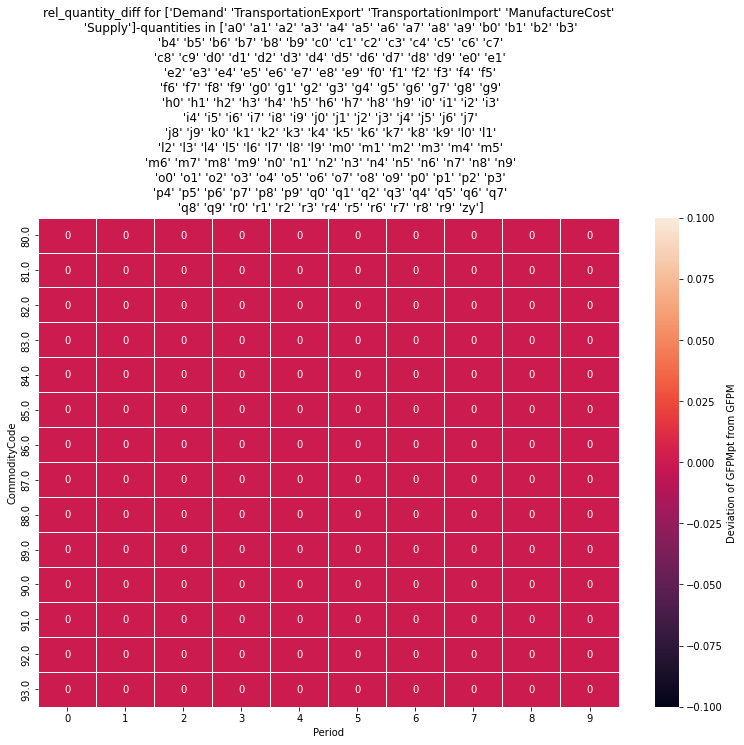

In [8]:
data_selection = data#['data_periods']

heatmap_dropdown_instance = HeatmapDropDown(data=data_selection)
heatmap_dropdown_instance.update_heatmap_data(reference_data=heatmap_dropdown_instance.reference_data_dropdown.value,
                                              validation_data=heatmap_dropdown_instance.validation_data_dropdown.value,
                                              comparator=heatmap_dropdown_instance.comparator_dropdown.value,
                                              region=heatmap_dropdown_instance.regioncode_dropdown.value,
                                              commodity=heatmap_dropdown_instance.regioncode_dropdown.value,
                                              domain=heatmap_dropdown_instance.domain_dropdown.value
                                              )

In [33]:
def forest_data_read_world500(file_name):
    file_path = f'input/{file_name}'
    try: 
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError: 
        print('Forest data not applicable')
        return None
    
if __name__ == '__main__':
    forest_data_world500 = 'Forest_Area_world500.csv'
    forest_data_world500 = forest_data_read_world500(forest_data_world500)

    if forest_data_world500 is not None:
        print(forest_data_world500)

      FOREST AREA  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         Country        2017      2020.0      2025.0      2030.0      2035.0   
1         Algeria        1430      1404.4      1365.1      1330.7      1301.0   
2          Angola       57624     57278.9     56748.1     56288.9     55901.0   
3           Benin        4220      4082.3      3864.8      3662.5      3474.5   
4        Botswana       10547     10233.7      9803.2      9502.0      9310.2   
..            ...         ...         ...         ...         ...         ...   
184  Turkmenistan        4127      4127.0      4144.2      4186.8      4247.4   
185       Ukraine        9894      9983.3     10154.3     10365.5     10619.6   
186    Uzbekistan        3249      3239.3      3237.3      3264.1      3321.1   
187   Former USSR           0         0.0         0.0         0.0         0.0   
188         World     3986662   3974833.0   3962335.1   3958888.7   3962300.8   

     Unnamed: 6  Unnamed: 7

In [34]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
#data = import_pkl.concat_scenarios()
print(data.keys())

{'Forest':       RegionCode  Period    ForStock      ForArea   FGDPCap     alpha  \
0             a0       0          46         1940  4027.502 -0.002767   
1             a0       0          46         1940  4027.502 -0.002767   
2             a0       0          46         1940  4027.502 -0.002767   
3             a0       0          46         1940  4027.502 -0.002767   
4             a0       0          46         1940  4027.502 -0.002767   
...          ...     ...         ...          ...       ...       ...   
25195         r9       9  830.931047  5503.912323  1973.337  0.009176   
25196         r9       9  830.931047  5503.912323  1973.337  0.009176   
25197         r9       9  830.931047  5503.912323  1973.337  0.009176   
25198         r9       9  830.931047  5503.912323  1973.337  0.009176   
25199         r9       9  830.931047  5503.912323  1973.337  0.009176   

          gamma       ga        gu  supply_from_forest CO2Price  
0      0.011213      NaN       NaN            

{'world_m_S_gf_G_81_LEC_specific_MB_cp_ha_le1':    Period     ForStock
0       0  556057.0000
1       1  559092.4375
2       2  565383.8125
3       3  573001.9375
4       4  582039.8750
5       5  592599.0625
6       6  604790.8125
7       7  618736.6875
8       8  634568.8750
9       9  652570.2500, 'world_m_S_gfour_G_81_LEC_specific_MB_cp_ha_le1':    Period     ForStock
0       0  556057.0000
1       1  559092.4375
2       2  565383.8125
3       3  573001.9375
4       4  582039.8750
5       5  592599.0625
6       6  604790.8125
7       7  618736.6875
8       8  634568.8750
9       9  652570.2500, 'world_m_S_gfour_all_all_LEC_specific_MB_cp_ha_le1':    Period     ForStock
0       0  556057.0000
1       1  559092.4375
2       2  565383.8125
3       3  573001.9375
4       4  582039.8750
5       5  592599.0625
6       6  604790.8125
7       7  618736.6875
8       8  634568.8750
9       9  652570.2500, 'world_m_S_gr_G_81_LEC_specific_MB_cp_ha_le1':    Period     ForStock
0       0  556057

AttributeError: 'dict' object has no attribute 'Period'

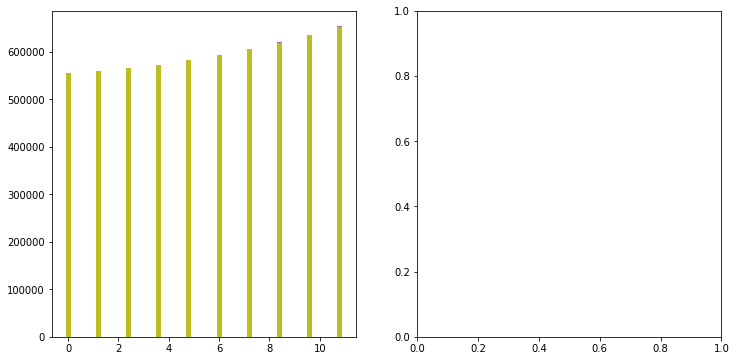

In [35]:
class Plot_forest:
    def __init__(self, data):
        self.data = data
        self.drop_duplicates()
  
    def drop_duplicates(self):
        self.data['Forest'] = self.data['Forest'].drop_duplicates().reset_index(drop=True)
        return self.data
    
    def plot_sum(self):
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        sum_stock = {}
        sum_area = {}
        width = 0.2
        value = self.data['Forest']
        value.ForStock = value.ForStock.astype("float32")
        value.ForArea = value.ForArea.astype("float32")
        value.Scenario = value.Scenario.astype("category")
        for key, group in value.groupby('Scenario'):
            sum_stock[key] = group.groupby('Period')['ForStock'].sum().reset_index()
            x_values = np.arange(len(sum_stock[key])) + width * np.arange(len(sum_stock[key]))
            axs[0].bar(x_values, sum_stock[key]['ForStock'].values, width=width, label=key)
            sum_area = value.groupby(['Scenario', 'Period'])['ForArea'].sum().reset_index()
        print(sum_stock)
        print(sum_area)
        
        axs[0].bar(sum_stock.Period, sum_stock.ForStock)

        axs[0].set_xlabel('Period')
        axs[0].set_ylabel('Sum of ForStock')
        axs[0].legend(loc='upper right')

        axs[1].bar(sum_area.Period, sum_area.ForArea)

        axs[1].set_xlabel('Period')
        axs[1].set_ylabel('Sum of ForArea')
        axs[1].legend(loc='lower center')

        plt.show()

if __name__ == "__main__":   
    plot = Plot_forest(data)
    plot.plot_sum()
    

      RegionCode  Period      ForStock        ForArea    FGDPCap     alpha  \
0             a0       0     46.000000    1940.000000   4027.502 -0.002767   
1             a1       0   4416.000000   68272.000000   3670.613 -0.016262   
2             a2       0    612.000000    3315.000000    838.585 -0.019504   
3             a3       0   1010.000000   15610.000000   7783.812 -0.024979   
4             a4       0   1174.000000    6366.000000    645.807 -0.009382   
...          ...     ...           ...            ...        ...       ...   
16195         r5       9  79390.828125  815259.000000  10393.927 -0.014551   
16196         r6       9     73.126404     477.737579    810.171  0.002092   
16197         r7       9    642.417053    4127.000000   6634.599 -0.009288   
16198         r8       9   3968.567627   10512.458984   2491.791 -0.000987   
16199         r9       9    830.930908    5503.912109   1973.337  0.009176   

          gamma       ga        gu  supply_from_forest CO2Price

KeyboardInterrupt: 

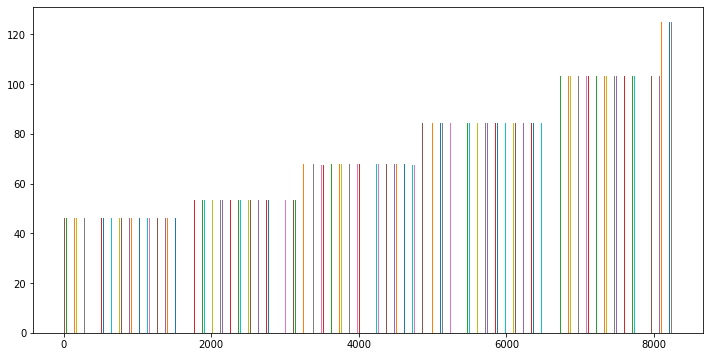

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class ForestData:
    def __init__(self, data):
        self.data = data['Forest']

    def print_forest(self):
        print(self.data)
    
    def drop_duplicates(self):
        self.data = self.data.drop_duplicates().reset_index(drop=True)

    def plot_stock_area_diagrams(self):
        unique_scenarios = self.data['Scenario'].unique()
        all_periods = self.data['Period']

        plt.figure(figsize=(12, 6))
        bar_width = 0.15
        bar_gap = 0.3
        for i, period in enumerate(all_periods):
            for j, scenario in enumerate(unique_scenarios):
                scenario_data = self.data[(self.data['Scenario'] == scenario) & (self.data['Period'] == period)]
                total_stock = scenario_data['ForStock']

                # Berücksichtigen Sie nur die vorhandenen Perioden
                plt.bar(i * len(unique_scenarios) + j * (bar_width + bar_gap), total_stock.iloc[0], label=f'{scenario} (Period {period})', width=bar_width)

        plt.xlabel('Scenarios')
        plt.ylabel('ForStock')
        plt.xticks(np.arange(len(all_periods) * len(unique_scenarios)) * (bar_width + bar_gap) + bar_width/2, [f'Period {p}' for p in all_periods])
        plt.legend()
        plt.title('ForStock for Each Scenario in All Periods')
        plt.show()

        plt.figure(figsize=(10, 6))
        for i, scenario in enumerate(unique_scenarios):
            scenario_data = self.data[self.data['Scenario'] == scenario]
            total_area = scenario_data.groupby('Period')['ForArea'].sum()

            # Berücksichtigen Sie nur die vorhandenen Perioden
            existing_periods = total_area.index.intersection(all_periods)
            plt.bar(existing_periods + i * (bar_width + bar_gap), total_area[existing_periods], label=scenario, width=bar_width)


        plt.xlabel('Period')
        plt.ylabel('Sum of ForArea')
        plt.legend()
        plt.title('ForArea')
        plt.show()

if __name__ == "__main__":
    data_container = data
    forest_instance = ForestData(data_container)
    forest_instance.print_forest()
    forest_instance.plot_stock_area_diagrams()

